Problem Statement: 
    
A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 
Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
                    •	There are no null values in the dataset. 
                    •	There may be some customers with no loan history. 
                    •	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
                    •	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
                    •	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  

Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.


# Let's import required libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from scipy import stats
import pylab

import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("micro credit data file.csv")
data

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [3]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
data.shape

(209593, 37)

Our dataset has 209593 rows and 37 columns.

In [5]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

Other than msisdn, pcircle and pdate all other columns are numerical i.e., Float and integer. Also we can drop column Unnamed: 0 as it contains serial number only, mobile number and pdate is also not required for further analysis.

In [6]:
data.drop(["Unnamed: 0",'msisdn','pdate'], axis=1, inplace=True)

# Describe the datasets:

In [7]:
data.describe(include='all').T

count unique  top    freq          mean  \
label                 209593.0    NaN  NaN     NaN      0.875177   
aon                   209593.0    NaN  NaN     NaN   8112.343445   
daily_decr30          209593.0    NaN  NaN     NaN   5381.402289   
daily_decr90          209593.0    NaN  NaN     NaN   6082.515068   
rental30              209593.0    NaN  NaN     NaN    2692.58191   
rental90              209593.0    NaN  NaN     NaN   3483.406534   
last_rech_date_ma     209593.0    NaN  NaN     NaN     3755.8478   
last_rech_date_da     209593.0    NaN  NaN     NaN   3712.202921   
last_rech_amt_ma      209593.0    NaN  NaN     NaN   2064.452797   
cnt_ma_rech30         209593.0    NaN  NaN     NaN      3.978057   
fr_ma_rech30          209593.0    NaN  NaN     NaN   3737.355121   
sumamnt_ma_rech30     209593.0    NaN  NaN     NaN   7704.501157   
medianamnt_ma_rech30  209593.0    NaN  NaN     NaN   1812.817952   
medianmarechprebal30  209593.0    NaN  NaN     NaN   3851.927942   
cnt_ma_rech90         209593.0    NaN  NaN     NaN       6.31543   
fr_ma_rech90          209593.0    NaN  NaN     NaN       7.71678   
sumamnt_ma_rech90     209593.0    NaN  NaN     NaN  12396.218352   
medianamnt_ma_rech90  209593.0    NaN  NaN     NaN   1864.595821   
medianmarechprebal90  209593.0    NaN  NaN     NaN     92.025541   
cnt_da_rech30         209593.0    NaN  NaN     NaN     262.57811   
fr_da_rech30          209593.0    NaN  NaN     NaN   3749.494447   
cnt_da_rech90         209593.0    NaN  NaN     NaN      0.041495   
fr_da_rech90          209593.0    NaN  NaN     NaN      0.045712   
cnt_loans30           209593.0    NaN  NaN     NaN      2.758981   
amnt_loans30          209593.0    NaN  NaN     NaN     17.952021   
maxamnt_loans30       209593.0    NaN  NaN     NaN    274.658747   
medianamnt_loans30    209593.0    NaN  NaN     NaN      0.054029   
cnt_loans90           209593.0    NaN  NaN     NaN     18.520919   
amnt_loans90          209593.0    NaN  NaN     NaN     23.645398   
maxamnt_loans90       209593.0    NaN  NaN     NaN      6.703134   
medianamnt_loans90    209593.0    NaN  NaN     NaN      0.046077   
payback30             209593.0    NaN  NaN     NaN      3.398826   
payback90             209593.0    NaN  NaN     NaN      4.321485   
pcircle                 209593      1  UPW  209593           NaN   

                               std        min     25%          50%      75%  \
label                     0.330519        0.0     1.0          1.0      1.0   
aon                   75696.082531      -48.0   246.0        527.0    982.0   
daily_decr30             9220.6234 -93.012667   42.44  1469.175667   7244.0   
daily_decr90          10918.812767 -93.012667  42.692       1500.0  7802.79   
rental30               4308.586781  -23737.14  280.42      1083.57  3356.94   
rental90               5770.461279  -24720.58  300.26       1334.0  4201.79   
last_rech_date_ma      53905.89223      -29.0     1.0          3.0      7.0   
last_rech_date_da      53374.83343      -29.0     0.0          0.0      0.0   
last_rech_amt_ma       2370.786034        0.0   770.0       1539.0   2309.0   
cnt_ma_rech30              4.25609        0.0     1.0          3.0      5.0   
fr_ma_rech30          53643.625172        0.0     0.0          2.0      6.0   
sumamnt_ma_rech30     10139.621714        0.0  1540.0       4628.0  10010.0   
medianamnt_ma_rech30    2070.86462        0.0   770.0       1539.0   1924.0   
medianmarechprebal30  54006.374433     -200.0    11.0         33.9     83.0   
cnt_ma_rech90              7.19347        0.0     2.0          4.0      8.0   
fr_ma_rech90             12.590251        0.0     0.0          2.0      8.0   
sumamnt_ma_rech90     16857.793882        0.0  2317.0       7226.0  16000.0   
medianamnt_ma_rech90   2081.680664        0.0   773.0       1539.0   1924.0   
medianmarechprebal90    369.215658     -200.0    14.6         36.0    79.31   
cnt_da_rech30          4183.897978        0.0     0.0          0

We can see we have only one unique value in pcircle hence we can drop that column.

In [8]:
data.drop("pcircle", axis=1, inplace=True)

We can see count of all columns is same. Still we will take a look at null values.

In [9]:
data.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

We dont have null values in our database. Let's see the same thing with help of heatmap:

<AxesSubplot:>

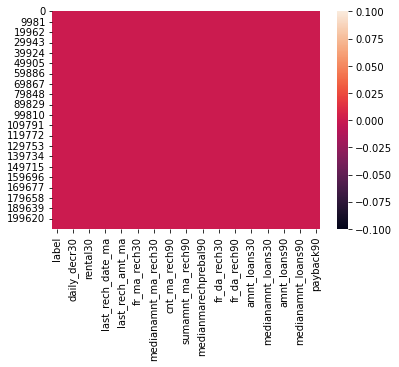

In [10]:
sns.heatmap(data.isnull())

In our database we have some columns with data of 30 days as well as 90 days. Last 90 days data obviously include data of 30 days, Hence I am dropping columns with 30 days data.

In [11]:
data = data[data.columns.drop(list(data.filter(regex='30')))]

In [12]:
data.columns

Index(['label', 'aon', 'daily_decr90', 'rental90', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback90'],
      dtype='object')

# Let's see some Visualization:

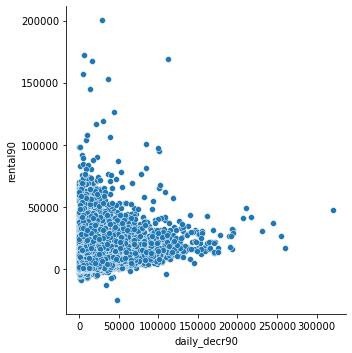

In [13]:
sns.relplot(x='daily_decr90',y='rental90',data=data,kind='scatter')

We can see positive relation between daily_decr90 and rental90. Maximum data for daily_decr90 is in range till 150000 and for rental90 its till 100000.

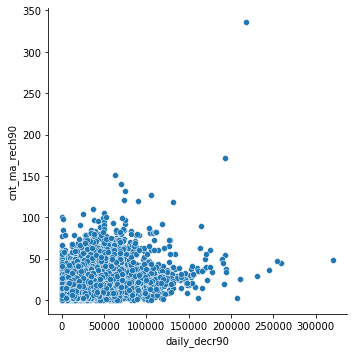

In [14]:
sns.relplot(x='daily_decr90',y='cnt_ma_rech90',data=data,kind='scatter')

Relation between daily_decr90 and cnt_ma_rech90 is also somewhat positive. Maximum amount for daily decr90 is ranging till 13000 and for cnt_ma_rech90 count is 100.

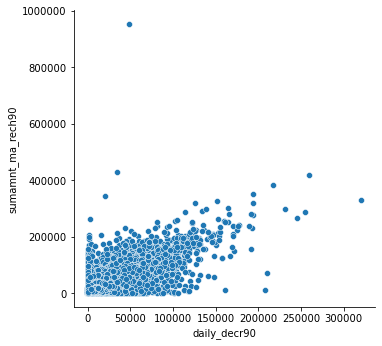

In [15]:
sns.relplot(x='daily_decr90',y='sumamnt_ma_rech90',data=data,kind='scatter')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Relation between daily_decr90 and sumamnt_ma_rech0 is also positive. Maximum amounts for daily decr is ranging till 15000 and for sumamnt_ma_rech30 its till 20000.

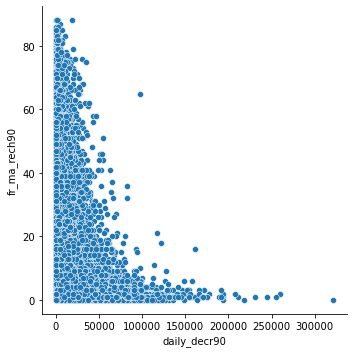

In [16]:
sns.relplot(x='daily_decr90',y='fr_ma_rech90',data=data,kind='scatter')

Relation between daily_decr90 and fr_ma_rech90 is also somewhat negative. Maximum amounts for daily decr90 is ranging till 150000 and for fr_ma_rech90 counts are spread over the entire range.

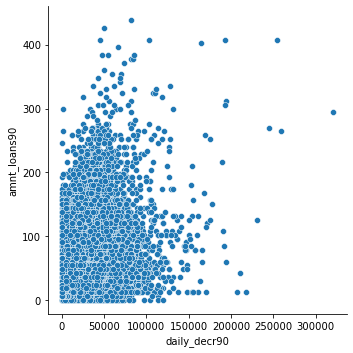

In [17]:
sns.relplot(x='daily_decr90',y='amnt_loans90',data=data,kind='scatter')

Relation between daily_decr90 and amnt_loans90 is also somewhat positive. Maximum amounts for daily decr90 is ranging till 15000 and for amnt_loans90 its till 300 counts.

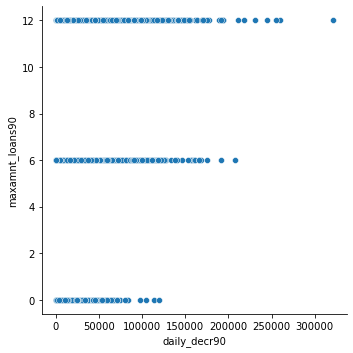

In [18]:
sns.relplot(x='daily_decr90',y='maxamnt_loans90',data=data,kind='scatter')

When maxamnt_loans90 is 0 then daily_decr90 ranging till 125000, when maxamnt_loans90 is 6 then daily_decr90 is ranging till 200000 and when maxamnt_loans90 is 12 then daily_decr90 is ranging till 250000.

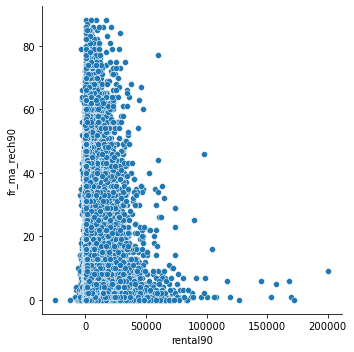

In [19]:
sns.relplot(x='rental90',y='fr_ma_rech90',data=data,kind='scatter')

Relation between rental90 and fr_ma_rech90 is positive. Data for fr_ma_rech90 is spread over the entire range.

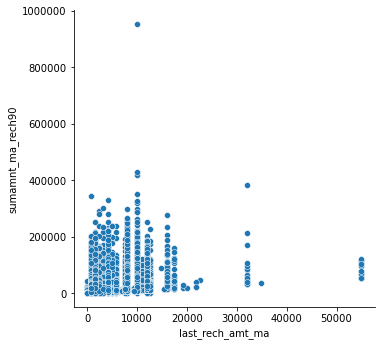

In [20]:
sns.relplot(x='last_rech_amt_ma',y='sumamnt_ma_rech90',data=data,kind='scatter')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

Relation between last_rech_amt_ma and last_rech_amt_ma is positive. Maximum amount of data for last_rech_amt_ma is ranging till 20000

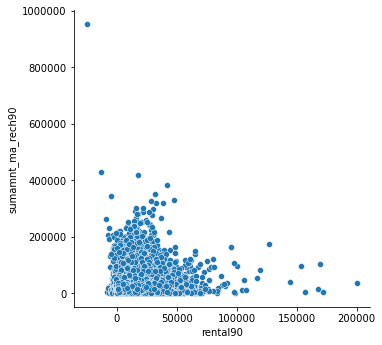

In [21]:
sns.relplot(x='rental90',y='sumamnt_ma_rech90',data=data,kind='scatter')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

For rental90 data is maximum number of data is ranging till 80000 and sumamnt_ma_rech30 its till 300000

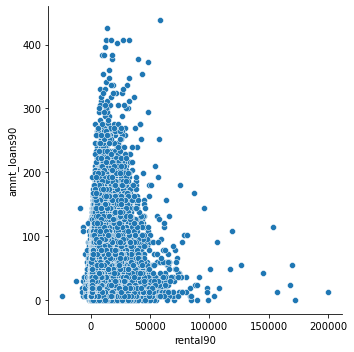

In [22]:
sns.relplot(x='rental90',y='amnt_loans90',data=data,kind='scatter')

For amnt_loans90 data is spread over the entire range and for rental90 maximum data is ranging till 80000.

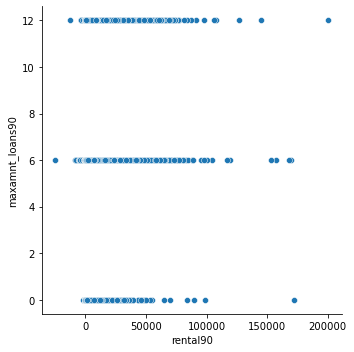

In [23]:
sns.relplot(x='rental90',y='maxamnt_loans90',data=data,kind='scatter')

When maxamnt_loans90 is 0 then maximum amount of rental90 is ranging till 100000, When maxamnt_loans90 is 6 then maximum amount rental90 is ranging till 120000 and When maxamnt_loans90 is 12 then maximum amount of rental90 is ranging till 120000.

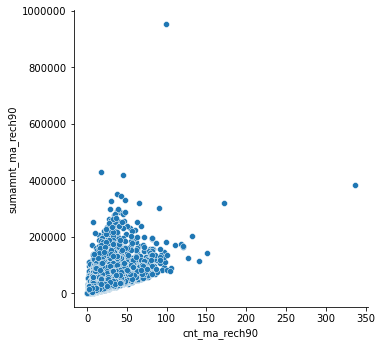

In [24]:
sns.relplot(x='cnt_ma_rech90',y='sumamnt_ma_rech90',data=data,kind='scatter')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

For cnt_ma_rech90 maximum data is ranging till 100 and for sumamnt_ma_rech90 maximum data is ranging till 300000. We can see positive relation between cnt_ma_rech90 and sumamnt_ma_rech90.

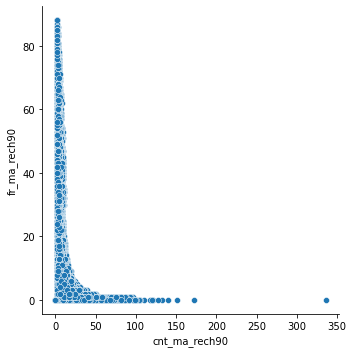

In [25]:
sns.relplot(x='cnt_ma_rech90',y='fr_ma_rech90',data=data,kind='scatter')

For fr_ma_rech90 data is spread over the entire range and for cnt_ma_rech90 maximum data is ranging till 150. Relation between cnt_ma_rech90 and fr_ma_rech90 is somewhat negative.

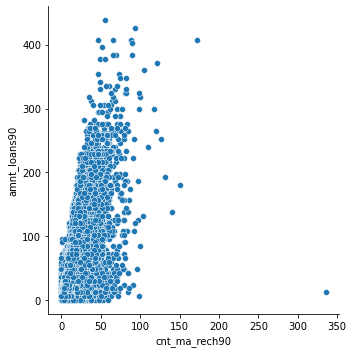

In [26]:
sns.relplot(x='cnt_ma_rech90',y='amnt_loans90',data=data,kind='scatter')

For amnt_loans90, data is spread over the entire range and for amnt_loans90 maximum data is till range 100.

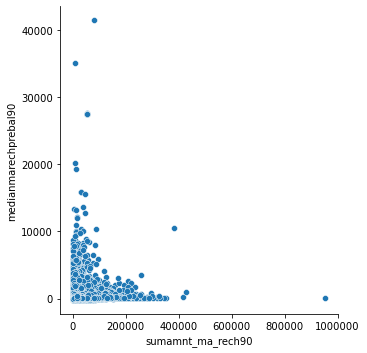

In [27]:
sns.relplot(x='sumamnt_ma_rech90',y='medianmarechprebal90',data=data,kind='scatter')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

For sumamnt_ma_rech90 maximum data is ranging till 380000 and for medianmarechprebal90 maximum data is ranging till 15000.

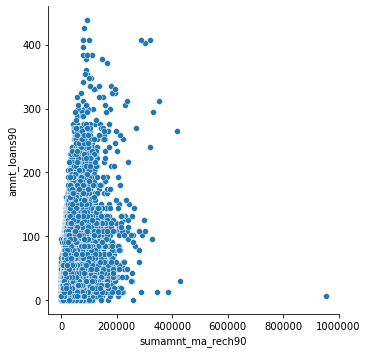

In [28]:
sns.relplot(x='sumamnt_ma_rech90',y='amnt_loans90',data=data,kind='scatter')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

For sumamnt_ma_rech90 maximum data is ranging till 300000 and for amnt_loans90 data is spread over the entire range.

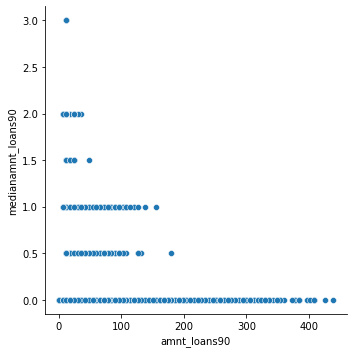

In [29]:
sns.relplot(x='amnt_loans90',y='medianamnt_loans90',data=data,kind='scatter')

When medianamnt_loans90 is 0 then amnt_loans90 is spread over the entire range, When medianamnt_loans90 is 0.5 then amnt_loans90 is ranging till 130, When medianamnt_loans90 is 1.0 then amnt_loans90 is ranging till 180, When medianamnt_loans90 is 1.5 then amnt_loans90 is ranging till 50, When medianamnt_loans90 is 2.0 then amnt_loans90 is ranging till 50, and When medianamnt_loans90 is 3.0 then amnt_loans90 is ranging till 10.

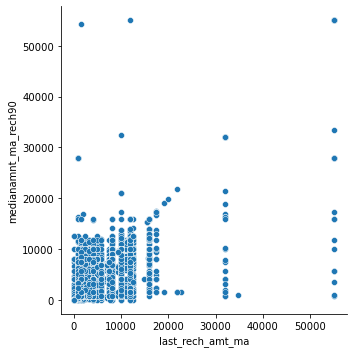

In [30]:
sns.relplot(x='last_rech_amt_ma',y='medianamnt_ma_rech90',data=data,kind='scatter')

For last_rech_amt_ma maximum data till the range 20000 and medianamnt_ma_rech90 its till 20000

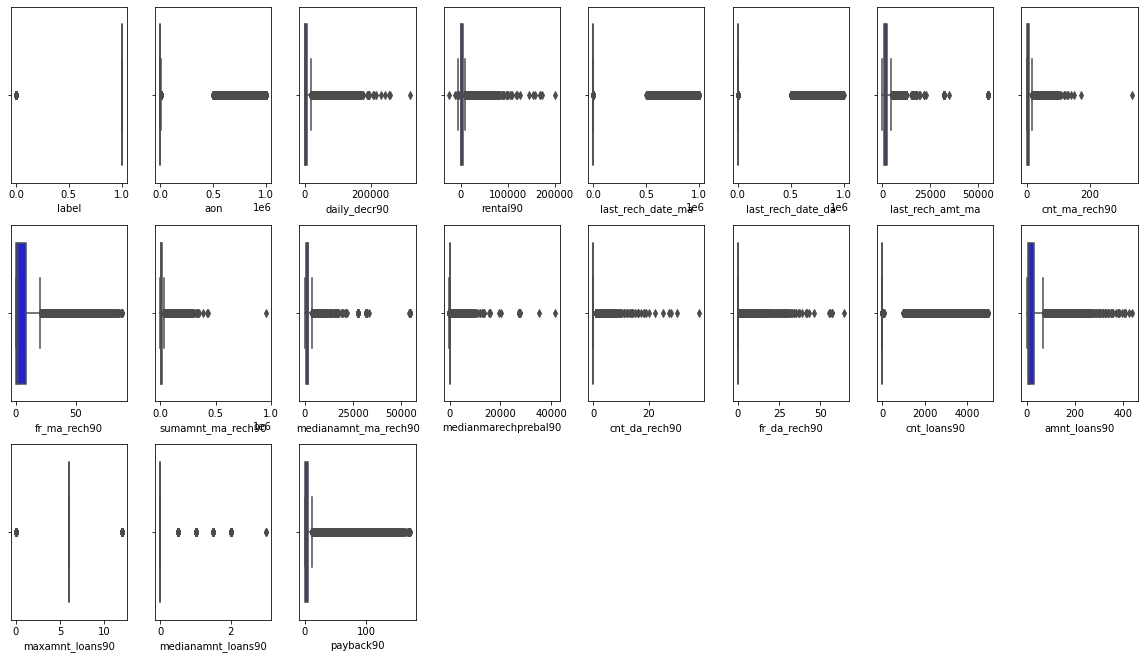

In [31]:
collist=data.columns.values
ncol=8
nrows=8
plt.figure(figsize=(2*ncol,3*ncol))
for i in range (0,len(collist)):
    if data.dtypes[i] != 'object':
        plt.subplot(nrows,ncol,i+1)
        sns.boxplot(data[collist[i]],color='Blue',orient='v')
        plt.tight_layout()

We can see outerliers in many columns, Lets check individually and then work on the same.

# Some functions for further analysis:

In [32]:
#below function will to detect outliers with the help IQR when feature has less/low skewness

def outlier_IQR_l(data_frame, feature_name):
    IQR=data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_limit=data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_limit=data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_limit,upper_limit)

In [33]:
#below function will to detect outliers with the help IQR when feature has high skewness

def outlier_IQR_h(data_frame, feature_name):
    IQR=data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_limit=data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_limit=data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_limit,upper_limit)

In [34]:
#below function will to detect outliers with the help of Zscore when feature data is distributed near to normal curve

def normaloutlier(data_frame, feature_name):
    lower_limit=data_frame[feature_name].mean() - 3 * data_frame[feature_name].std()
    upper_bridge=data_frame[feature_name].mean() + 3 * data_frame[feature_name].std()
    return(lower_limit,upper_limit)

In [35]:
# below function will help us to check skewness and distribution

def distribution(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name],dist='norm',plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Distribution")

In [36]:
#Log transformation

def log_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('log transformation')

In [37]:
#Reciprocal transformation

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=1/data_frame_copy[feature_name]
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('reciprocal transformation')

In [38]:
#Squareroot transformation

def sqaureroot_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('Squareroot transformation')

In [39]:
#exponential transformation

def exponential_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('exponential transformation')

In [40]:
#Boxcox transformation

def boxcox_transform(data_frame,feature_name):
    data_frame_copy=data_frame.copy()
    #data_frame_copy = data_frame_copy[data_frame_copy >= 0]
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name]=stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name],dist='norm',plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title('Boxcox transformation')

# Let's Work on features individually

aon

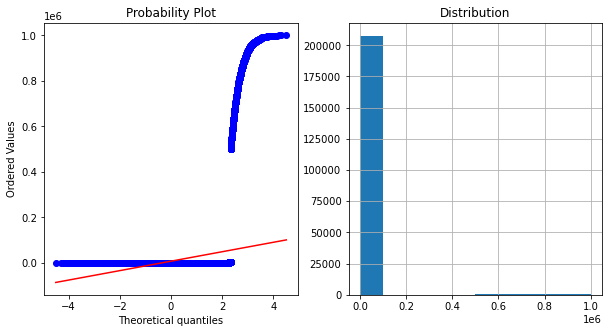

In [41]:
distribution(data,"aon")
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

In [42]:
#We can see aon is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"aon")

(-1962.0, 3190.0)

In [43]:
data.loc[data['aon']>= 3190.0,'aon']=3190.0

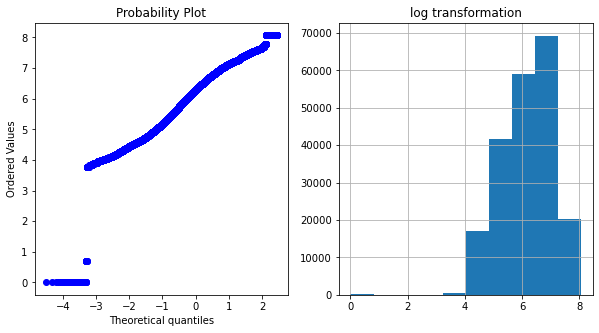

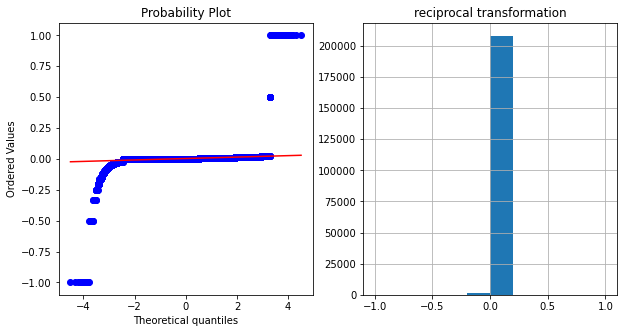

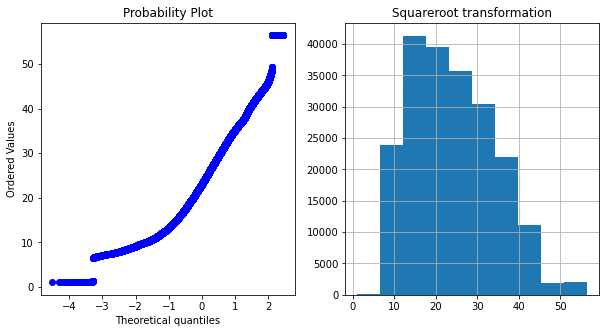

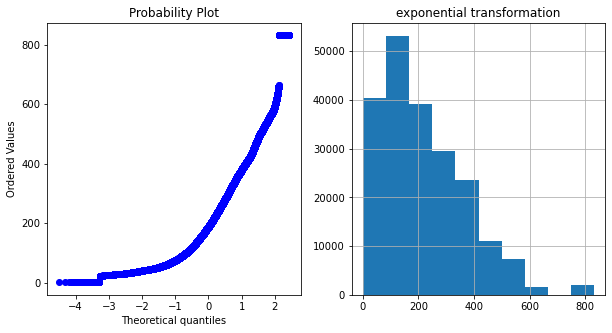

In [44]:
#Apply some transformation technique on aon for make distribution as normally distribution and check distribution by QQ plot

log_transform(data,"aon")
reciprocal_transform(data,"aon")
sqaureroot_transform(data,"aon")
exponential_transform(data,"aon")
for i in data.aon:
    if i > 0:
        break
    else:
        boxcox_transform(data,"aon")

In [45]:
# Apply reciprocal transformation on aon feature
if 0 in data['aon'].unique():
    pass
else:
    data['aon']=1/data['aon']

Transformation functions are not working for all other columns.

daily_decr90

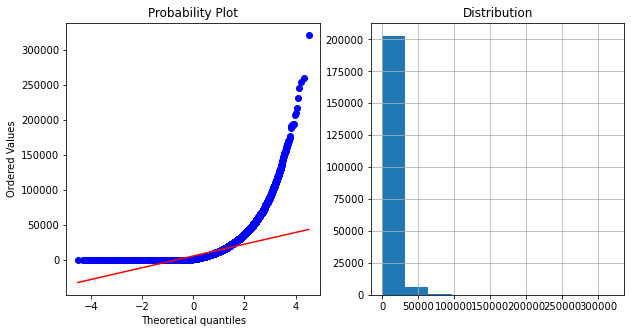

In [46]:
distribution(data,"daily_decr90")

In [47]:
#We can see daily_decr90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"daily_decr90")

(-23237.60200000003, 31083.08400000004)

In [48]:
data.loc[data['daily_decr90']>= 31083.08400000004,'daily_decr90']=31083.08400000004

rental90

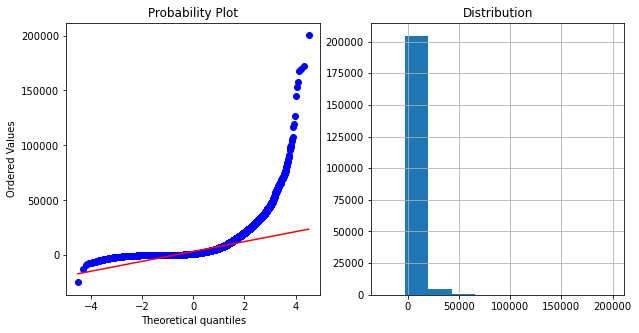

In [49]:
distribution(data,"rental90")

In [50]:
#We can see rental90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"rental90")

(-11404.33, 15906.380000000001)

In [51]:
data.loc[data['rental90']>= 15906.380000000001,'rental90']=15906.380000000001

last_rech_date_ma

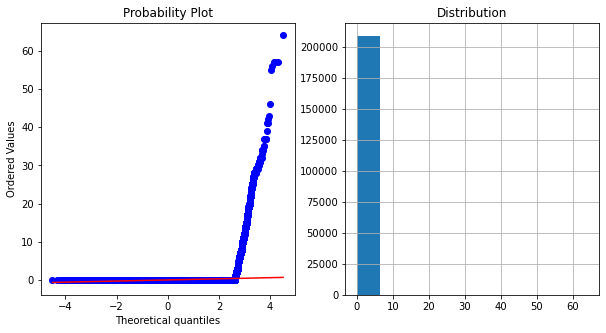

In [52]:
distribution(data,"fr_da_rech90")

In [53]:
#We can see last_rech_date_ma is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"last_rech_date_ma")

(-17.0, 25.0)

In [54]:
data.loc[data['last_rech_date_ma']>= 25.0,'last_rech_date_ma']=25.0

last_rech_date_da

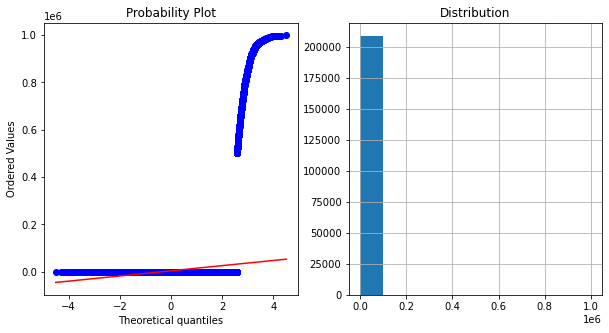

In [55]:
distribution(data,"last_rech_date_da")

In [56]:
#We can see last_rech_date_da is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"last_rech_date_da")

(0.0, 0.0)

we can see other than 0 all other values in feature last_rech_date_da are outlier, if we replace outliers with 0 then there will be only one unique value i.e. 0, hence i consider to drop this column.

In [57]:
data.drop("last_rech_date_da", axis=1, inplace=True)

last_rech_amt_ma

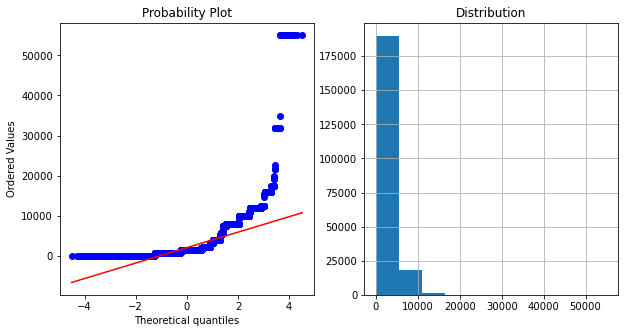

In [58]:
distribution(data,"last_rech_amt_ma")

In [59]:
#We can see last_rech_amt_ma is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"last_rech_amt_ma")

(-3847.0, 6926.0)

In [60]:
data.loc[data['last_rech_amt_ma']>= 6926.0,'last_rech_amt_ma']=6926.0

cnt_ma_rech90

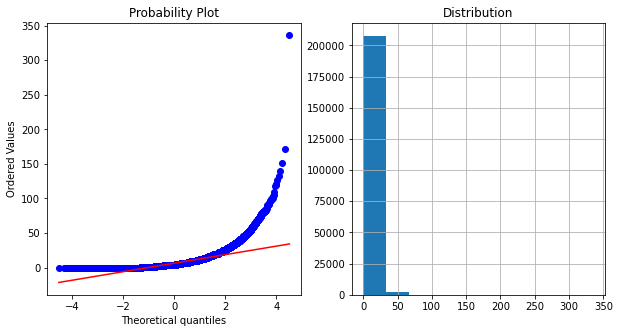

In [61]:
distribution(data,"cnt_ma_rech90")

In [62]:
#We can see cnt_ma_rech90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"cnt_ma_rech90")

(-16.0, 26.0)

In [63]:
data.loc[data['cnt_ma_rech90']>= 26.0,'cnt_ma_rech90']=26.0

fr_ma_rech90

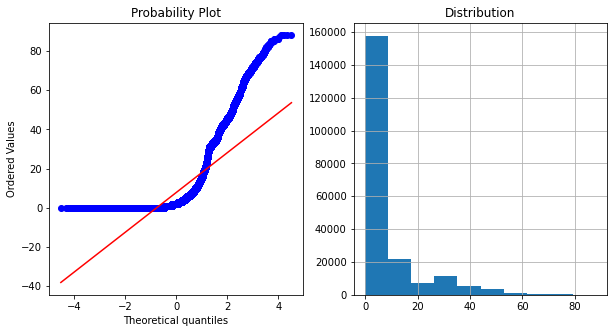

In [64]:
distribution(data,"fr_ma_rech90")

In [65]:
#We can see aon is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"fr_ma_rech90")

(-24.0, 32.0)

In [66]:
data.loc[data['fr_ma_rech90']>= 32.0,'fr_ma_rech90']=32.0

sumamnt_ma_rech90

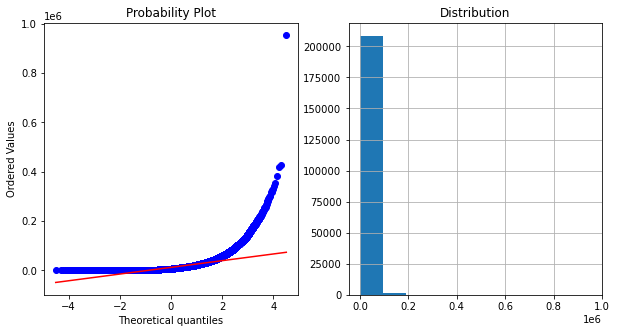

In [67]:
distribution(data,"sumamnt_ma_rech90")

In [68]:
#We can see sumamnt_ma_rech90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"sumamnt_ma_rech90")

(-38732.0, 57049.0)

In [69]:
data.loc[data['sumamnt_ma_rech90']>= 57049.0,'sumamnt_ma_rech90']=57049.0

medianamnt_ma_rech90

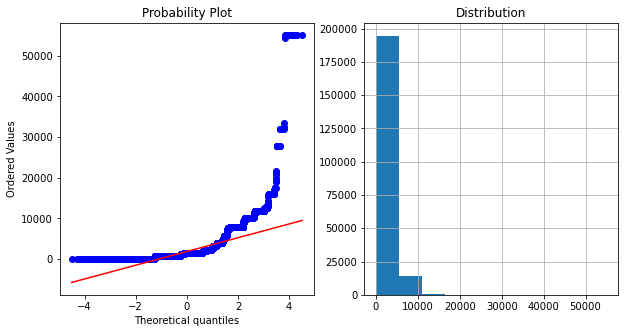

In [70]:
distribution(data,"medianamnt_ma_rech90")

In [71]:
#We can see medianamnt_ma_rech90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"medianamnt_ma_rech90")

(-2680.0, 5377.0)

In [72]:
data.loc[data['medianamnt_ma_rech90']>= 5377.0,'medianamnt_ma_rech90']=5377.0

medianmarechprebal90

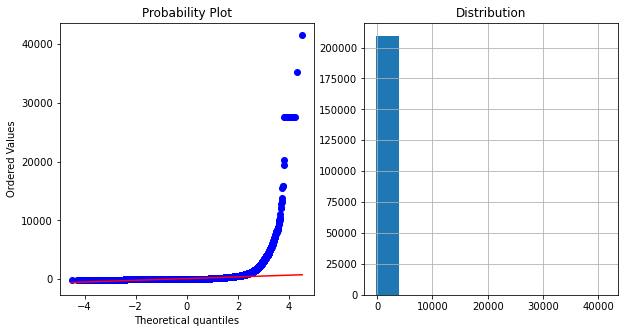

In [73]:
distribution(data,"medianmarechprebal90")

In [74]:
#We can see medianmarechprebal90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"medianmarechprebal90")

(-179.53000000000023, 273.4400000000005)

In [75]:
data.loc[data['medianmarechprebal90']>= 273.4400000000005,'medianmarechprebal90']=273.4400000000005

cnt_da_rech90

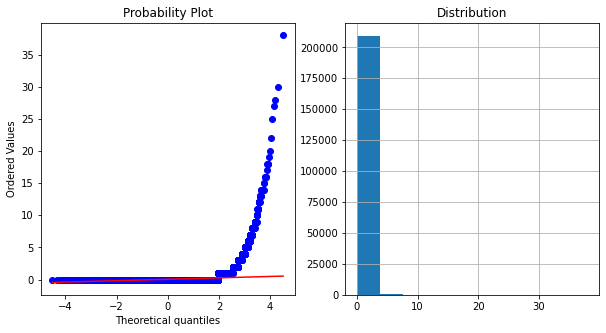

In [76]:
distribution(data,"cnt_da_rech90")

In [77]:
#We can see cnt_da_rech90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"cnt_da_rech90")

(0.0, 0.0)

we can see other than 0 all other values in feature cnt_da_rech90 are outlier, if we replace outliers with 0 then there will be only one unique value i.e. 0, hence i consider to drop this column.

In [78]:
data.drop("cnt_da_rech90", axis=1, inplace=True)#feature has been dropped

fr_da_rech90

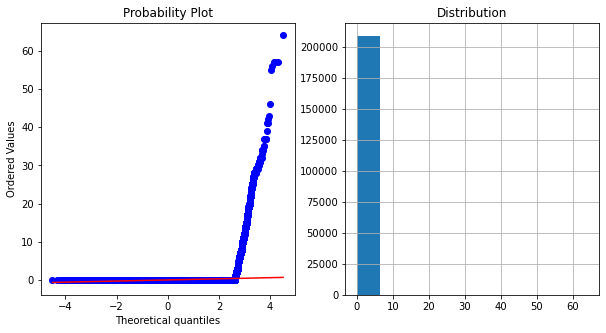

In [79]:
distribution(data,"fr_da_rech90")

In [80]:
#We can see fr_da_rech90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"fr_da_rech90")

(0.0, 0.0)

we can see other than 0 all other values in feature fr_da_rech90 are outlier, if we replace outliers with 0 then there will be only one unique value i.e. 0, hence i consider to drop this column.

In [81]:
data.drop("fr_da_rech90", axis=1, inplace=True)

cnt_loans90

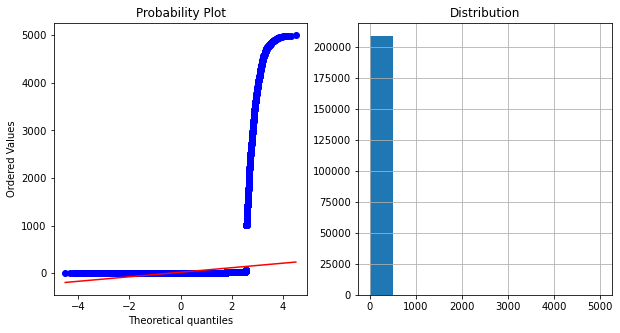

In [82]:
distribution(data,"cnt_loans90")

In [83]:
#We can see cnt_loans90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"cnt_loans90")

(-11.0, 17.0)

In [84]:
data.loc[data['cnt_loans90']>= 17.0,'cnt_loans90']=17.0

amnt_loans90

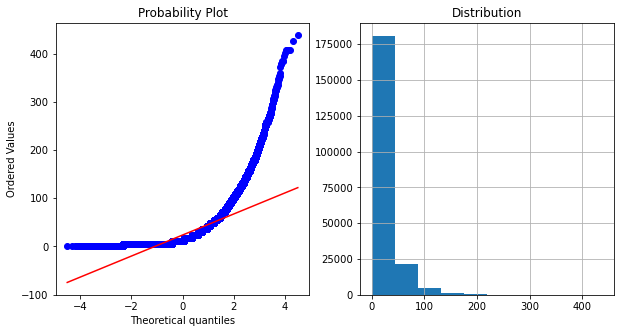

In [85]:
distribution(data,"amnt_loans90")

In [86]:
#We can see amnt_loans90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"amnt_loans90")

(-66.0, 102.0)

In [87]:
data.loc[data['amnt_loans90']>= 102.05,'amnt_loans90']=102.0

maxamnt_loans90

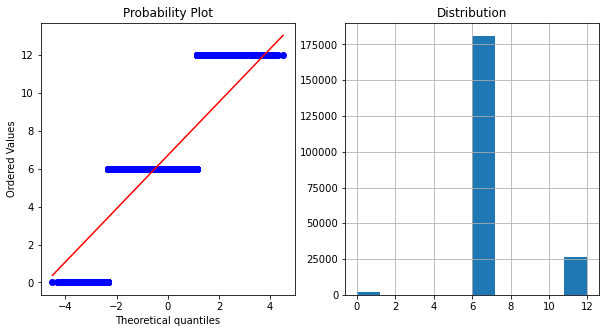

In [88]:
distribution(data,"maxamnt_loans90")

In [89]:
#We can see maxamnt_loans90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"maxamnt_loans90")

(6.0, 6.0)

we can see other than 6.0 all other values in feature maxamnt_loans90 are outlier, if we replace outliers with 6.0 then there will be only one unique value i.e. 6.0, hence i consider to drop this column.

In [90]:
data.drop("maxamnt_loans90", axis=1, inplace=True)

medianamnt_loans90

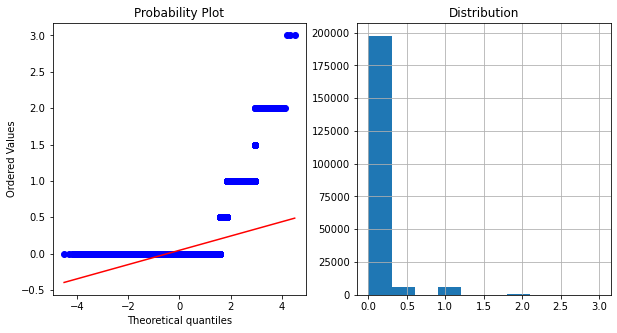

In [91]:
distribution(data,"medianamnt_loans90")

In [92]:
#We can see medianamnt_loans90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"medianamnt_loans90")

(0.0, 0.0)

we can see other than 0 all other values in feature medianamnt_loans90 are outlier, if we replace outliers with 0 then there will be only one unique value i.e. 0, hence i consider to drop this column.

In [93]:
data.drop('medianamnt_loans90', axis=1, inplace=True)

payback90

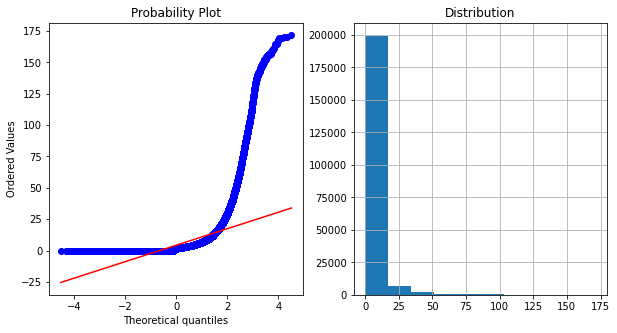

In [94]:
distribution(data,"payback90")

In [95]:
#We can see payback90 is highly skewed hence i will go with IQR_h method
outlier_IQR_h(data,"payback90")

(-13.5, 18.0)

In [96]:
data.loc[data['payback90']>= 18.0,'payback90']=18.0

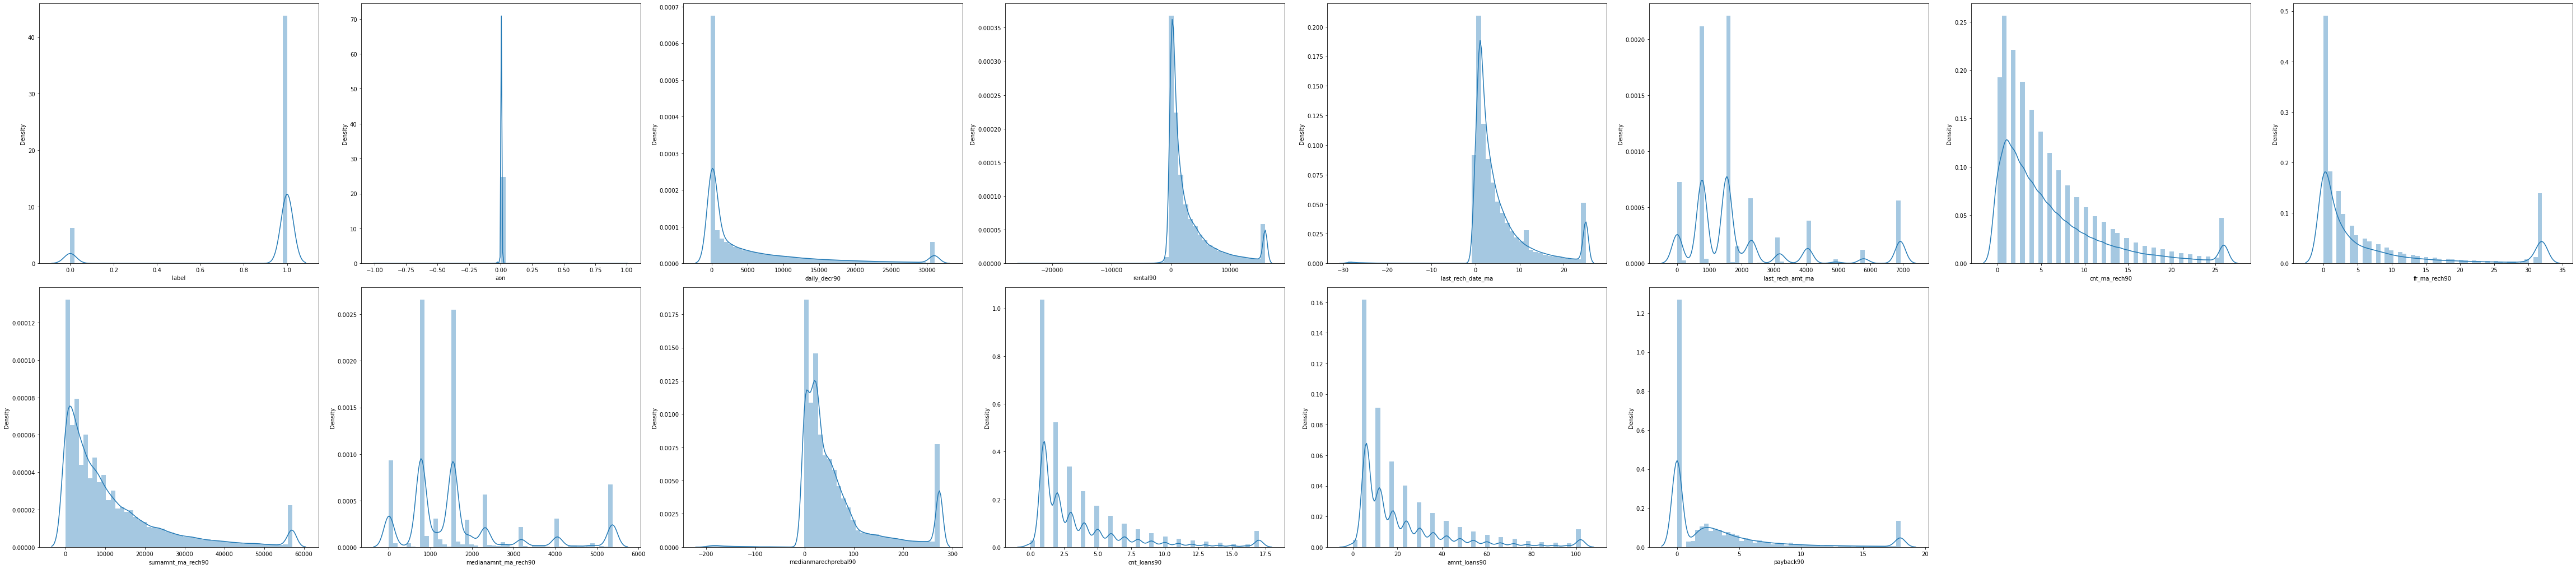

In [97]:
collist=data.columns.values
ncol=8
nrows=8
plt.figure(figsize=(8*ncol,7*ncol),edgecolor="black")
for i in range (0,len(collist)):
    if data.dtypes[i] != 'object':
        plt.subplot(nrows,ncol,i+1)
        sns.distplot(data[data.columns[i]])
        plt.tight_layout()

<AxesSubplot:>

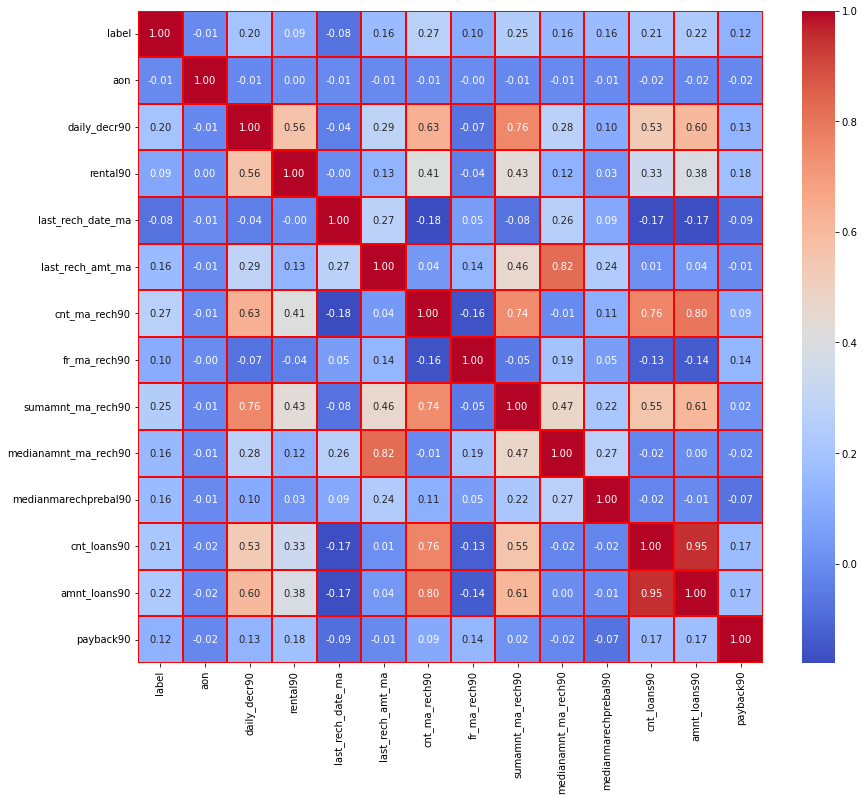

In [98]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f",cmap="coolwarm")

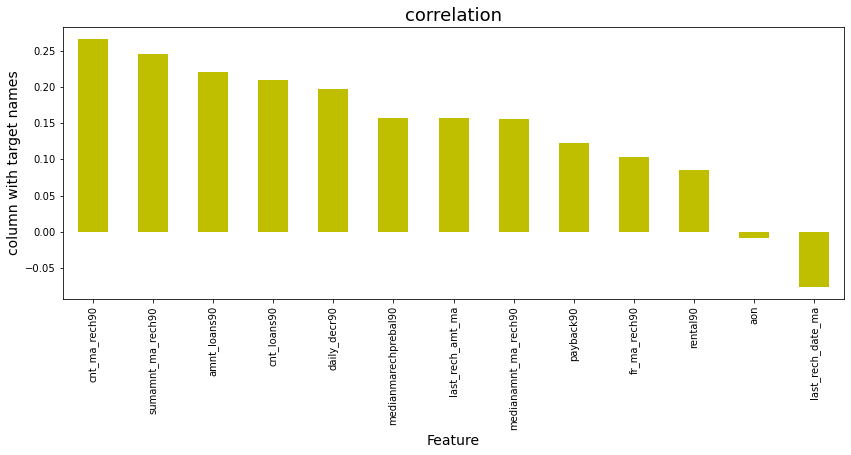

In [99]:
plt.figure(figsize=(14,5))
data.corr()['label'].sort_values(ascending=False).drop(['label']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [100]:
data.drop('aon', axis=1, inplace=True)

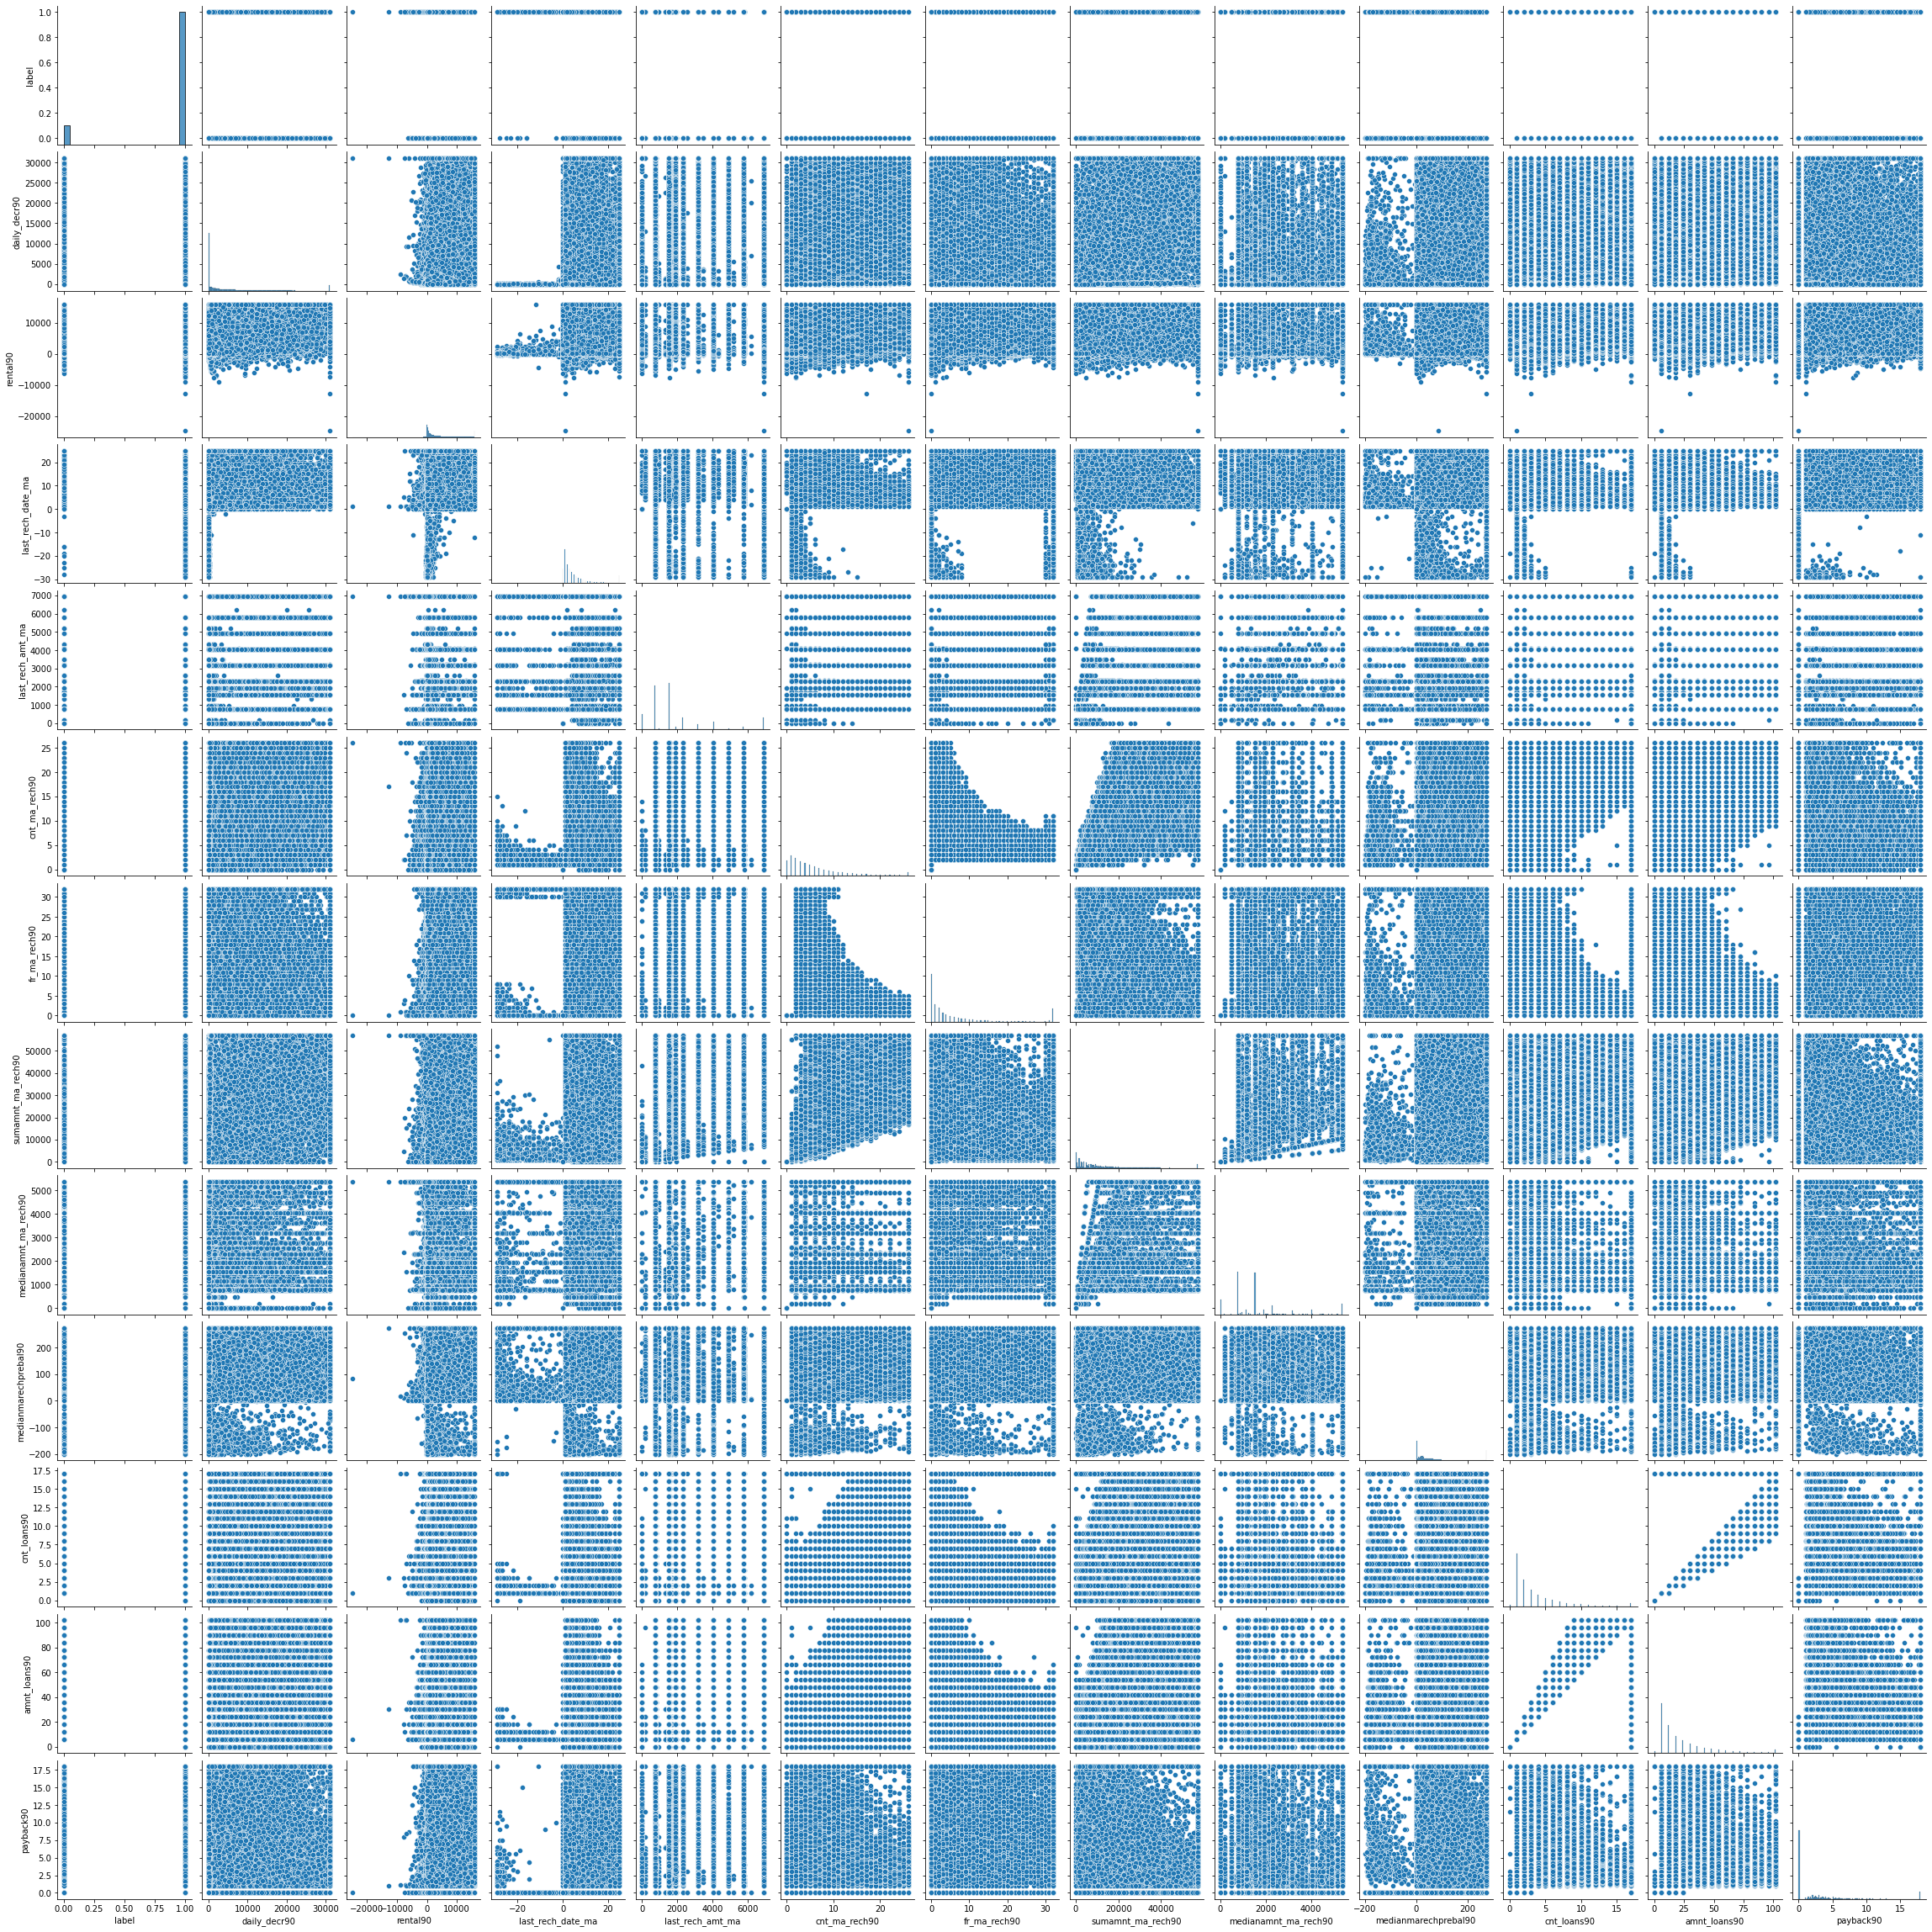

In [101]:
sns.pairplot(data)

# Skewness and outliers removal:

In [102]:
data.skew()

label                  -2.270254
daily_decr90            1.785188
rental90                1.765769
last_rech_date_ma       1.086744
last_rech_amt_ma        1.656548
cnt_ma_rech90           1.516680
fr_ma_rech90            1.650263
sumamnt_ma_rech90       1.760046
medianamnt_ma_rech90    1.431250
medianmarechprebal90    1.392096
cnt_loans90             1.911960
amnt_loans90            1.829131
payback90               1.825511
dtype: float64

As we have already delt with outliers.

In [103]:
x=data.drop('label', axis=1)
y=data['label']
print(x.shape)
print(y.shape)

(209593, 12)
(209593,)


In [104]:
from sklearn.preprocessing import power_transform
data_new=power_transform(x)

data_new=pd.DataFrame(data_new,columns=x.columns)

In [105]:
data_new.skew()

daily_decr90           -6.244673
rental90               -1.046043
last_rech_date_ma       0.015803
last_rech_amt_ma       -0.172648
cnt_ma_rech90          -0.013313
fr_ma_rech90            0.128961
sumamnt_ma_rech90      -0.274652
medianamnt_ma_rech90   -0.243194
medianmarechprebal90    0.400360
cnt_loans90             0.100062
amnt_loans90           -0.002188
payback90               0.182777
dtype: float64

Skewness has now been reduced.

# Let's perform scaling now:

In [106]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit_transform(data_new)

array([[ 0.31182077, -0.66376346, -0.44899921, ..., -0.20174088,
        -0.25940212,  1.68102057],
       [ 1.08730494,  0.22402666,  1.98972434, ..., -1.03840847,
        -0.25940212, -1.02147618],
       [-0.02607081, -0.47076755, -0.29895889, ..., -1.03840847,
        -1.01274484, -1.02147618],
       ...,
       [ 1.07513081,  1.33982491, -0.29895889, ...,  1.05993228,
         1.39349071,  0.76165679],
       [ 1.11163267, -0.44719923, -0.44899921, ...,  0.29159119,
         0.50728348,  1.3939803 ],
       [ 0.50657201, -0.54811168,  1.08388664, ..., -0.20174088,
         0.18909619, -1.02147618]])

In [107]:
x=data_new

# Finding best random state:

In [108]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu, " on Random State ",maxRS)

Best accuracy is  0.8836565757770939  on Random State  81


In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)

# Model building:

In [110]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),AdaBoostClassifier(),RandomForestClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy Score of LogisticRegression() is:
0.8836565757770939
[[  500  4603]
 [  274 36542]]
              precision    recall  f1-score   support

           0       0.65      0.10      0.17      5103
           1       0.89      0.99      0.94     36816

    accuracy                           0.88     41919
   macro avg       0.77      0.55      0.55     41919
weighted avg       0.86      0.88      0.84     41919



Accuracy Score of DecisionTreeClassifier() is:
0.8645005844605071
[[ 2537  2566]
 [ 3114 33702]]
              precision    recall  f1-score   support

           0       0.45      0.50      0.47      5103
           1       0.93      0.92      0.92     36816

    accuracy                           0.86     41919
   macro avg       0.69      0.71      0.70     41919
weighted avg       0.87      0.86      0.87     41919



Accuracy Score of SVC() is:
0.8998306257305756
[[ 1405  3698]
 [  501 36315]]
              precision    recall  f1-score   support

           0       

We can see AdaBoostClassifier has 90.67% accuracy with 91 f1 score and RandomForestClassifier has 91.08% accuracy with 91 f1 score hence do hyper parameter tunning with the this two model.

# Hyper parameter tunning:

AdaBoostClassifier

In [111]:
from sklearn.model_selection import RandomizedSearchCV
#creating  parameter list to pass in RandomizedSearchCV

parameters={'base_estimator':[None],'n_estimators':[20,40, 50,75,100],
            'learning_rate':[0.1,0.01,1.0,2.0],'algorithm':['SAMME.R','SAMME'],
            'random_state':range(0,20)}


In [112]:
RSV=RandomizedSearchCV(AdaBoostClassifier(),parameters,cv=5)

In [113]:
RSV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(),
                   param_distributions={'algorithm': ['SAMME.R', 'SAMME'],
                                        'base_estimator': [None],
                                        'learning_rate': [0.1, 0.01, 1.0, 2.0],
                                        'n_estimators': [20, 40, 50, 75, 100],
                                        'random_state': range(0, 20)})

In [114]:
RSV.best_params_

{'random_state': 11,
 'n_estimators': 100,
 'learning_rate': 1.0,
 'base_estimator': None,
 'algorithm': 'SAMME.R'}

In [115]:
RSV_pred=RSV.best_estimator_.predict(x_test) 

In [116]:
RSV_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [117]:
RSV.score(x_train,y_train)

0.9036463613917483

Hyper parameter tunning with adaboost classifier gives us 90.36 % accuracy.

RandomForestClassifier

In [121]:
parameters={'n_estimators':[100],'criterion':['gini','entropy'],'max_depth':[None],
            'min_samples_split':[2],'min_samples_leaf':[1],'min_weight_fraction_leaf':[0.0],
            'max_features':['auto'],'max_leaf_nodes':[None],'min_impurity_decrease':[0.0],
            'bootstrap':[True,False],'oob_score':[True,False],'n_jobs':[None],
            'random_state':range(0,20),'verbose':[0],'warm_start':[True,False],'class_weight':[None],
            'ccp_alpha':[0.0],'max_samples':[None]}

In [122]:
RSV=RandomizedSearchCV(RandomForestClassifier(),parameters,cv=5)

In [123]:
RSV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0],
                                        'class_weight': [None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [100], 'n_jobs': [None],
                                        'oob_score': [True

In [124]:
RSV.best_params_

{'warm_start': True,
 'verbose': 0,
 'random_state': 3,
 'oob_score': False,
 'n_jobs': None,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': None,
 'max_features': 'auto',
 'max_depth': None,
 'criterion': 'entropy',
 'class_weight': None,
 'ccp_alpha': 0.0,
 'bootstrap': True}

In [125]:
RSV_pred=RSV.best_estimator_.predict(x_test) 

In [126]:
RSV_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [127]:
RSV.score(x_train,y_train)

0.9964395195438768

Hyper parameter tunning with RandomForestClassifier gives us 99.65 % accuracy.

# AUC_ROC:

In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [129]:
#RandomizedSearchCV
fpr,tpr,thresholds=roc_curve(y_test,RSV_pred)

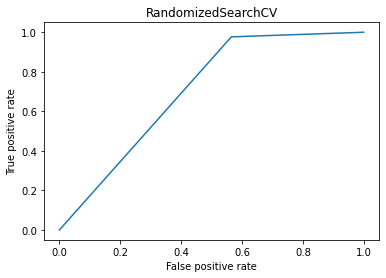

In [130]:
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label='RandomizedSearchCV')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomizedSearchCV')
plt.show()

In [131]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
auc_score=roc_auc_score(y_test,ad.predict(x_test))
print(auc_score)

0.6449265805629585


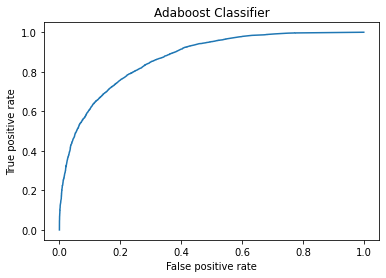

In [132]:
#Adaboost classifier curve
y_pred_prob=ad.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label='Adaboost Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Adaboost Classifier')
plt.show()

In [133]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
auc_score=roc_auc_score(y_test,rfc.predict(x_test))
print(auc_score)

0.703430605600254


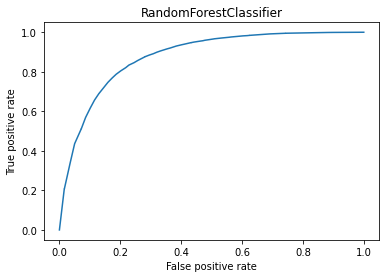

In [134]:
#RandomForestClassifier
y_pred_prob=rfc.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0.1],[0.1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

As we got best accuaracy score with RandomForestClassifier and AUC_roc score is also graph is better than other model hence i am saving that model.

# Saving model

In [135]:
import joblib
joblib.dump(RSV,"RSVMCDP.obj")

['RSVMCDP.obj']

In [136]:
RSVfile=joblib.load("RSVMCDP.obj")
RSVfile.predict(x_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [137]:
#end